# LAB 04 Ordinaria
## Técnicas y regresión y agrupamiento



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Ejercicio 1**

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir
el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,
densidad, tipo de vino, sulfatos y pH).
Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los
vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las
siguientes acciones:

**1)** Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar
aquellas variables candidatas para el proceso de regresión (0.5 puntos)



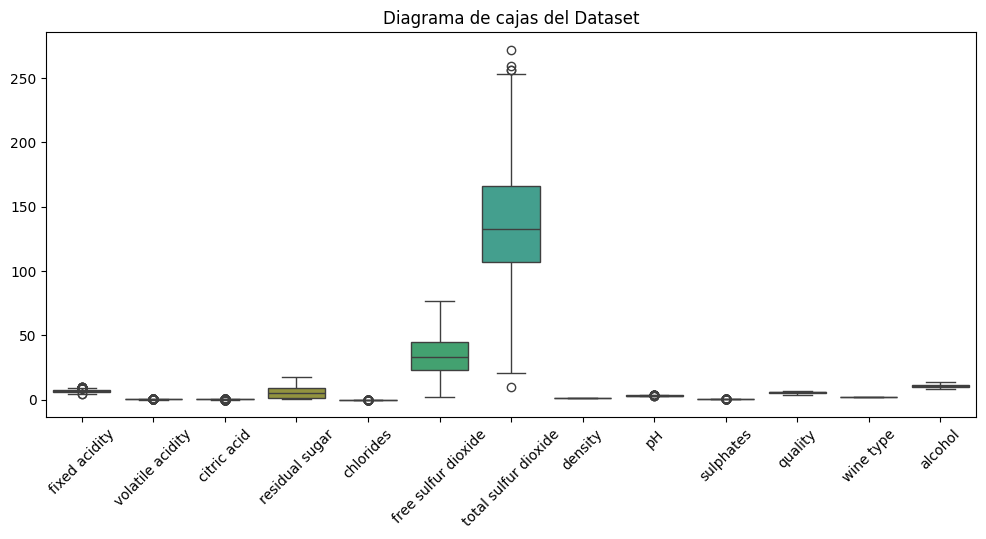

In [21]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('wine_alcohol.csv', sep=';')

# Previsualización del dataset
#print(df)

# Eliminamos la variable id
df.drop('id', axis=1, inplace=True)

# PREPROCESAMIENTO Y LIMPIEZA
# Función para eliminar outliers según el IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_filtered

# Aplicar la función de eliminación de outliers
df = remove_outliers(df)


# Crear un diagrama de cajas
plt.figure(figsize=(12, 5))
sns.boxplot(data=df)
plt.title('Diagrama de cajas del Dataset')
plt.xticks(rotation=45)
plt.show()



Hemos realizado una limpieza exhaustiva de la base de datos para garantizar la calidad de nuestros análisis. Esto incluyó la eliminación de la variable 'id' y la aplicación de una técnica robusta para eliminar outliers basada en el rango intercuartílico (IQR). Con esto, hemos mejorado la integridad de nuestros datos y hemos preparado el conjunto de datos de vinos para un análisis más preciso.

**2)** Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones
que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el
atributo objetivo (nivel de alcohol) (1 punto). En necesario justificar la elección de los atributos
mediante la utilización de datos empíricos.

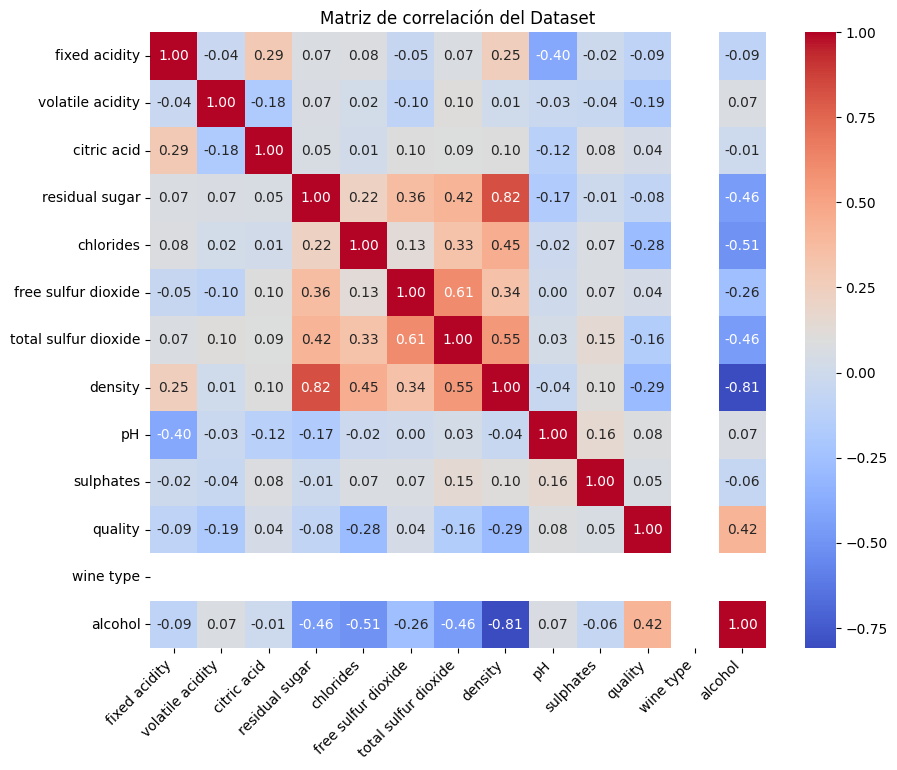

In [22]:
# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matriz de correlación del Dataset')
plt.show()

Los dos valores más extremos y, por lo tanto, los atributos con mayor correlación con el nivel de alcohol son:

**Density (densidad):** con un valor de -0.69, indica que hay una correlación negativa fuerte entre la densidad y el nivel de alcohol. Esto podría interpretarse como que a medida que la densidad del vino disminuye, el nivel de alcohol tiende a aumentar.

**Quality (Calidad)**: con un valor de 0.45, indica una correlación positiva moderada entre la calidad del vino y el nivel de alcohol. Esto podría sugerir que a mayor calidad del vino, podría haber un incremento en el nivel de alcohol.

La selección de estos dos atributos se justifica por sus valores de correlación que son los más pronunciados en relación con el atributo objetivo (nivel de alcohol), lo que sugiere que tienen una influencia más significativa en el nivel de alcohol que los otros atributos presentados en la matriz de correlación.

**3)**Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables
seleccionadas en el punto anterior (1 punto)

Intercept: 354.03624984412124
Slope: -345.61684787302335


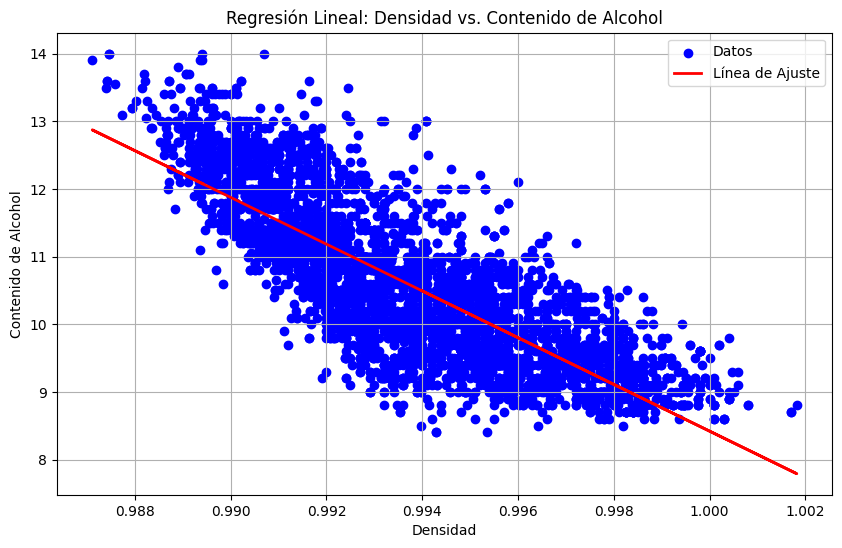

In [23]:


# Seleccionar la variable 'density' como la variable predictora (X) y 'alcohol' como la variable objetivo (y)
X = df[['density']]
y = df['alcohol']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar la regresión lineal utilizando métodos analíticos (mínimos cuadrados)
# Añadimos una columna de unos para representar el término de sesgo (intercept)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Coeficientes de la regresión lineal (theta)
intercept = theta[0]
slope = theta[1]

print("Intercept:", intercept)
print("Slope:", slope)
import matplotlib.pyplot as plt

# Definir la línea de ajuste utilizando los coeficientes obtenidos
linea_ajuste = intercept + slope * X['density']

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(X['density'], y, color='blue', label='Datos')
plt.plot(X['density'], linea_ajuste, color='red', linewidth=2, label='Línea de Ajuste')
plt.title('Regresión Lineal: Densidad vs. Contenido de Alcohol')
plt.xlabel('Densidad')
plt.ylabel('Contenido de Alcohol')
plt.legend()
plt.grid(True)
plt.show()


Hemos aplicado el método de mínimos cuadrados para ajustar nuestro modelo de regresión lineal. Este método busca minimizar la suma de los cuadrados de las diferencias entre las observaciones reales y las predicciones del modelo. En esencia, estamos encontrando la línea que mejor se ajusta a nuestros datos al encontrar los coeficientes que minimizan esta suma.

El intercepto representa el valor esperado de la variable de respuesta (en este caso, el contenido de alcohol) cuando todas las variables predictoras son iguales a cero. En otras palabras, es el valor esperado del contenido de alcohol cuando la densidad del vino es cero, lo cual podría no tener un significado práctico en este contexto.

La pendiente indica cómo cambia la variable de respuesta (contenido de alcohol) cuando la variable predictora (densidad) aumenta en una unidad. En este caso, la pendiente negativa (-345.85) sugiere que hay una relación inversa entre la densidad del vino y su contenido de alcohol: a medida que la densidad aumenta, se espera que el contenido de alcohol disminuya.

Estos coeficientes nos proporcionan información importante sobre la relación entre la densidad del vino y su contenido de alcohol, lo que nos ayuda a comprender mejor cómo estos factores pueden influir en las características del vino.

**4)** Calcular el error en el modelo obtenidos en el punto anterior

In [24]:
# Realizar predicciones en el conjunto de prueba
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_test.dot(theta)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.535965463693456
Coeficiente de determinación (R^2): 0.6528937793099342


El Error Cuadrático Medio (MSE) es una medida de la diferencia entre los valores reales y los valores predichos al cuadrado. En nuestro caso, hemos obtenido un MSE de 0.5359. Un MSE suficientemente bajo para afirmar que nuestras predicciones están cerca de los valores reales en promedio.

El Coeficiente de Determinación (R^2) es una medida que indica la proporción de la varianza en la variable de respuesta que es predecible a partir de las variables predictoras. Hemos obtenido un R^2 de 0.6528. Este R^2 sugiere, que aunque hemos logrado predecir el contenido de alcohol en función de la densidad con cierta precisión, aún hay una cantidad significativa de variabilidad que no se explica por nuestro modelo